Populating the interactive namespace from numpy and matplotlib
tpd =  0.25 A =  4.5
Delta,  cont_bottom-d8 peak
0.0 -0.39086299999999996
0.5 -0.05567000000000011
1.0 -0.0003219999999997114
1.5 0.00026900000000007473
1.6 0.001422999999999952
2.0 0.004396099999999903
2.5 0.005488019999999996
3.0 0.004922499999999941
3.5 0.0047080000000001565
4.0 0.005103999999999997
tpd =  0.25 A =  5.5
Delta,  cont_bottom-d8 peak
0.0 -0.5648630000000003
0.5 -0.05567000000000011
1.0 -0.0003219999999997114
1.5 0.00026900000000007473
1.6 0.0004230000000000622
2.0 0.003396100000000013
2.5 0.004488019999999995
3.0 0.00392249999999994
3.5 0.0037080000000000446
4.0 0.0041040000000001076
tpd =  0.25

/home/mijiang/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['linalg', 'random', 'power', 'info', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


 A =  6.5
Delta,  cont_bottom-d8 peak
0.0 -0.5648630000000003
0.5 -0.05567000000000011
1.0 -0.0003219999999997114
1.5 0.00026900000000007473
1.6 0.0004230000000000622
2.0 0.002396100000000012
2.5 0.0034880199999999945
3.0 0.002922499999999939
3.5 0.0027080000000001547
4.0 0.0031039999999999957
tpd =  0.25 A =  7.5
Delta,  cont_bottom-d8 peak
0.0 -0.5648630000000003
0.5 -0.22567000000000004
1.0 -0.0003219999999997114
1.5 0.00026900000000007473
1.6 0.0004230000000000622
2.0 0.002396100000000012
2.5 0.0034880199999999945
3.0 0.002922499999999939
3.5 0.0027080000000001547
4.0 0.002104000000000106
tpd =  0.25 A =  8.5
Delta,  cont_bottom-d8 peak
0.0 -0.5648630000000003
0.5 -0.22567000000000004
1.0 -0.05432199999999998
1.5 0.00026900000000007473
1.6 0.0004230000000000622
2.0 0.002396100000000012
2.5 0.0024880199999999936
3.0 0.002922499999999939
3.5 0.0027080000000001547
4.0 0.002104000000000106


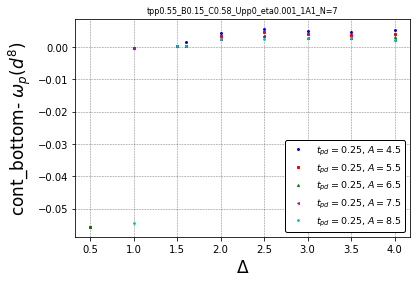

In [6]:
# Supplemental program for 1A1_lowest_peak_dispersion.ipynb
# to compare the Aw and w position for the lowest peak in 1A1 channel
# for 3-, 7-orbital models

%pylab inline

import math
import numpy as np
from scipy.sparse.linalg import inv
#from numpy.linalg import inv
import scipy.sparse as sps
import scipy.sparse.linalg
import sys
import matplotlib.pyplot as plt
sys.path.append('../../src/')
from pylab import *

##########################################################################
# bottom of d9L continuum - d8_lowpeak for 1A1
##########################################################################
ed = 0
tpds = [0.1, 0.2, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7]
tpds = np.arange(0.25, 0.251, 0.5)
tpp = 0.55

pds = 1.5
pdp = 0.7
#pds = 0.00001
#pdp = 0.00001
pps = 1.0
ppp = 0.3

As = np.arange(4.5, 8.51, 1.0)
B = 0.15
C = 0.58
Upp = 0
eta = 0.001

Norb7 = 7
Mc7 = 25

titlename = 'tpp'+str(tpp)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp)+'_eta'+str(eta)

Ms = ['bo','rs','g^','m<','cp','k>','yv','bh','--r','--g','--m','--c','--k','--y']

ii = 0
for tpd in tpds:
    for A in As:
        print 'tpd = ', tpd, 'A = ', A
        f1A1 = '/Norb7_tpd'+str(tpd)+'_tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp) \
               +'_Mc'+str(Mc7)+'_eta'+str(eta)+'_1A1.txt'
        a = loadtxt('./Norb7/data_lowpeak/tpd'+str(tpd)+f1A1,skiprows=0)

        # continuum bottom via lowest peak of two-hole calculation with A=100, B=C=0:
        #b = loadtxt('./Norb7/A6.5_varyD/data_lowpeak/Aw_Cu_dx2y2_O_Norb7_tpd'+str(tpd) \
        #            +'_tpp0.55_A50_B0_C0_Upp0_Mc32_eta0.001.txt',skiprows=0)
        #assert(max(abs(a[:,0]-b[:,0]))<1.e-3)    
        #ab = b[:,2]-a[:,2]

        # continuum bottom via G.S. energy of two-hole calculation with A=100, B=C=0 with only (up,dn) states:
        b = loadtxt('./Norb7/data_GS_as_continuum_bottom/Egs_Norb7_tpd'+str(tpd) \
                    +'_tpp0.55_A100_B0_C0_Upp0_Mc25_eta0.001_1A1.txt',skiprows=0)
        #assert(max(abs(a[:,0]-b[:,0]))<1.e-3)    
        ab = b[:,3]-a[:,3]

        # debug:
        print 'Delta,  cont_bottom-d8 peak'
        for i in range(0,len(a)):
            print a[i,1],ab[i]

        idx = find(ab>-0.2)
        plot(a[idx,1], ab[idx], Ms[ii], Markersize=2, label="$t_{pd}=$"+str(tpd)+", $A=$"+str(A))
        #plot(a[:,0], ab, Ms[ii], Markersize=2, label="$t_{pd}=$"+str(tpd)+"$A=$"+str(A))
        ii += 1

        # find critical Delta
        '''
        idx = find(ab>0.)
        ab_min = min(ab[idx])
        id_min = find(ab==ab_min)
        print 'min positive d9L-wpeak = ', ab_min, 'at Delta = ', a[id_min,0]
        idx = find(ab<0.)
        ab_max = max(ab[idx])
        id_max = find(ab==ab_max)
        print 'max negative d9L-wpeak = ', ab_max, 'at Delta = ', a[id_max,0]
        '''

title(titlename+'_1A1_N=7', fontsize=8)
xlabel('$\Delta$',fontsize=17)
ylabel('cont_bottom- $\omega_p(d^8)$',fontsize=17)
#xlim([0,1])
#ylim([0,0.1])
#text(0.45, 0.1, '(a)', fontsize=16)
grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
savefig("./Norb7/dw_lowpeak_"+titlename+"_1A1.pdf")

tpd =  0.25 A =  6.5
Delta,  cont_bottom-d8 peak
6.5 -0.025443000000000104
6.6 -0.021542000000000172
6.7 -0.016674000000000078
6.8 -0.009837999999999347
6.9 0.0019679999999997477
7.0 0.02074599999999993
7.1 0.048497999999999486
7.2 0.08722299999999983
7.3 0.13792500000000008
7.4 0.1976040000000001


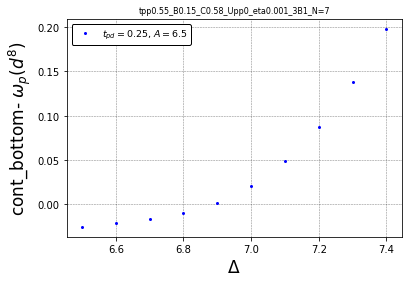

In [5]:
##########################################################################
# bottom of d9L continuum - d8_lowpeak for 3B1
##########################################################################
ed = 0
tpds = [0.1, 0.2, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7]
tpds = np.arange(0.25, 0.251, 0.5)
tpp = 0.55

pds = 1.5
pdp = 0.7
#pds = 0.00001
#pdp = 0.00001
pps = 1.0
ppp = 0.3

As = np.arange(6.5, 6.51, 1.0)
B = 0.15
C = 0.58
Upp = 0
eta = 0.001

Norb7 = 7
Mc7 = 25

titlename = 'tpp'+str(tpp)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp)+'_eta'+str(eta)

Ms = ['bo','rs','g^','m<','cp','k>','yv','bh','--r','--g','--m','--c','--k','--y']

ii = 0
for tpd in tpds:
    for A in As:
        print 'tpd = ', tpd, 'A = ', A
        f3B1 = '/Norb7_tpd'+str(tpd)+'_tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp) \
               +'_Mc'+str(Mc7)+'_eta'+str(eta)+'_3B1.txt'
        a = loadtxt('./Norb7/data_lowpeak/tpd'+str(tpd)+f3B1,skiprows=0)

        # continuum bottom via lowest peak of two-hole calculation with A=100, B=C=0:
        #b = loadtxt('./Norb7/A6.5_varyD/data_lowpeak/Aw_Cu_dx2y2_O_Norb7_tpd'+str(tpd) \
        #            +'_tpp0.55_A50_B0_C0_Upp0_Mc32_eta0.001.txt',skiprows=0)
        #assert(max(abs(a[:,0]-b[:,0]))<1.e-3)    
        #ab = b[:,2]-a[:,2]

        # continuum bottom via G.S. energy of two-hole calculation with A=100, B=C=0 with only (up,dn) states:
        b = loadtxt('./Norb7/data_GS_as_continuum_bottom/Egs_Norb7_tpd'+str(tpd) \
                    +'_tpp0.55_A100_B0_C0_Upp0_Mc25_eta0.001_3B1.txt',skiprows=0)
        #assert(max(abs(a[:,0]-b[:,0]))<1.e-3)    
        ab = b[:,3]-a[:,3]

        # debug:
        print 'Delta,  cont_bottom-d8 peak'
        for i in range(0,len(a)):
            print a[i,1],ab[i]

        idx = find(ab>-0.2)
        plot(a[idx,1], ab[idx], Ms[ii], Markersize=2, label="$t_{pd}=$"+str(tpd)+", $A=$"+str(A))
        #plot(a[:,0], ab, Ms[ii], Markersize=2, label="$t_{pd}=$"+str(tpd)+"$A=$"+str(A))
        ii += 1

        # find critical Delta
        '''
        idx = find(ab>0.)
        ab_min = min(ab[idx])
        id_min = find(ab==ab_min)
        print 'min positive d9L-wpeak = ', ab_min, 'at Delta = ', a[id_min,0]
        idx = find(ab<0.)
        ab_max = max(ab[idx])
        id_max = find(ab==ab_max)
        print 'max negative d9L-wpeak = ', ab_max, 'at Delta = ', a[id_max,0]
        '''

title(titlename+'_3B1_N=7', fontsize=8)
xlabel('$\Delta$',fontsize=17)
ylabel('cont_bottom- $\omega_p(d^8)$',fontsize=17)
#xlim([0,1])
#ylim([0,0.5])
#text(0.45, 0.1, '(a)', fontsize=16)
grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
savefig("./Norb7/dw_lowpeak_"+titlename+"_3B1.pdf")